## Perceptron - different alfas

In [8]:
import pandas as pd
from data import *
plt.style.use('ggplot')

In [9]:
repetitions = 200
estimate_func = lambda v: unipolar(0, v)
x_all = reproduce_x_times(x_unipolar, repetitions)
d_all = reproduce_x_times(d_unipolar, repetitions)
x_all = x_all + get_random_except_first_row(x_all.shape)
x_all[:, :5], d_all[:, :5]

(array([[ 1.        ,  1.        ,  1.        ,  1.        ,  1.        ],
        [-0.03606362, -0.02496382,  0.97309701,  1.00277238,  0.04988682],
        [-0.0292016 ,  0.96753944, -0.00888248,  0.96289581, -0.03844299]]),
 array([[0, 0, 0, 1, 0]]))

In [10]:
test_size = int(x_all.shape[1] * 0.25)
train_size = int(x_all.shape[1] - test_size)
x_train, x_test = x_all[:, :train_size], x_all[:, train_size:]
d_train, d_test = d_all[:, :train_size], d_all[:, train_size:]
x_train.shape, x_test.shape, d_train.shape, d_test.shape

((3, 600), (3, 200), (1, 600), (1, 200))

In [11]:
x_range = np.arange(-2, 4)
experiments_numb = 1000

### Dane experymentów

In [12]:
perceptrons = []
for alfa in list(np.linspace(0, 1, num=100))[1:]:
    p = Perceptron(x_train, d_train, x_test, d_test, estimate_func, alfa, (-0.1, 0.1))
    for i in range(experiments_numb):
        p.count()
    perceptrons.append(p)
len(perceptrons)

99

,α,average epoch count
0,0.010101,6.609
1,0.020202,7.165
2,0.030303,7.571
3,0.040404,7.550
4,0.050505,7.348
...,...,...
94,0.959596,7.311
95,0.969697,7.128
96,0.979798,7.215
97,0.989899,7.225


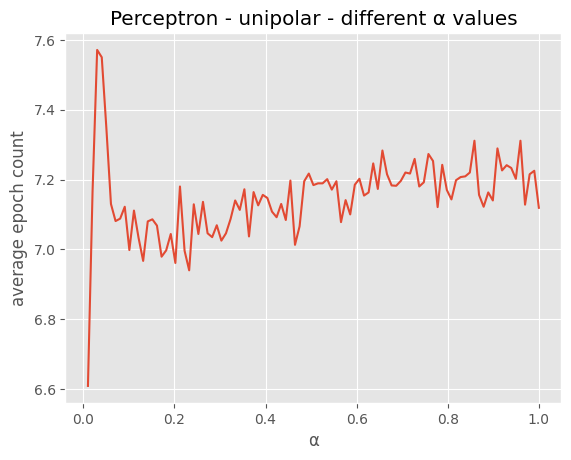

In [16]:
x, y = [v.alfa for v in perceptrons], [v.average_epoch_count for v in perceptrons]
plt.plot(x, y)
plt.title("Perceptron - unipolar - different α values")
plt.xlabel("α")
plt.ylabel("average epoch count")
# plt.ylim(0, 8)
pd.DataFrame({"α":x, "average epoch count":y})